# Polynomial fit (polynomial regression)
While an infinite Taylor series (polynomial of infinite degree) can represent any smooth function, the task is to find the coefficients of the finite polynomial which best fit the given data points. 
<p>Let us consider $n$ data points, i.e., pairs of values $(x_i,y_i)$, that represent the measurement of some functional dependence $y(x)$, and fit it with a polynomial of degree $m$:
$$
y(x) = b_0 +b_1x + b_2x^2 + b_3x^3 + ... b_mx^m
$$<br>
The system of equation for all data points could be rewritten in the following matrix form:<p>
$$
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
\approx
\begin{pmatrix}
&1 &x_1 &x_1^2 &x_1^3 &\cdots &x_1^m\\
&1 &x_2 &x_2^2 &x_2^3 &\cdots &x_2^m\\
&\vdots &\vdots &\vdots &\vdots &\vdots\\
&1 &x_n &x_n^2 &x_n^3 &\cdots &x_n^m\\
\end{pmatrix}
\begin{pmatrix}
b_1\\
b_2\\
\vdots\\
b_m
\end{pmatrix}
$$
Or:
$$
\mathbf Y \approx \mathbf X \mathbf B
$$<br>
Matrtix $\mathbf X$ is the <i>Vandermonde</i> matrix. On the right side we have the model predicitons of $y_i$-values for each $x_i$-value, and we want these values to be close to the measured values $y_i$ by adjusting the expansion coefficients $b_i$. If $m=n$, we will have an exact solution as the number of equations matches the number of unknown parameters $b_i$, provided that all equations are independent. For $m<n$, we will have to minimize the difference between the measured $y_i$ data points and the model prerdictions $y(x_i)$ (least square fit):<p>
$$
|| \epsilon ||^2 = \mathbf {||{Y - XB}||^2 = \left( Y - XB\right)^T \left( Y - XB\right) = Y^TY - 2B^TX^TY + B^TX^TXB}
$$<br>
We need to minimize the difference by varying coefficiens $b$, i.e., find the set of parameters or which the first derivative over $\mathbf B$ is zero:<p>
$$
\mathbf {-2X^TY + 2X^TXB = 0 }
$$
And we have the equation for polynomial coefficients:<p>
$$
\mathbf {B = (X^T X)^{-1} X^T Y}
$$<br>
Note that $\mathbf X$ is an $m \times n$ matrix, not necessarily square. However, the $\mathbf {(X^T X)}$ is square $m \times m$, and the matrtix multiplications in the equation above work out nicely.
<p>The following program implements the procedure above explicitly in the <i>poly_regression</i> function. Note that the numpy library has specialized functions for polynomial fit, such as numpy.polyfit, and numpy.polynomial package. The latter package  is optimized for a better numerical stability.

In [36]:
from math import *
import numpy as np

# ************************************************
#   Polynomial regression to data set x,y (arrays of equal length), degree is polynomial degree
#   returns: polynomial coefficients (degree+1 array) and Vandermonde matrix
# ************************************************

def poly_regression(x,y,degree): # x and y are data arrays, degree is the polynomial degree to fit with
    # make Vandermode matrix 
    # X = np.vander(x,degree+1,increasing = True) - can use the builtin numpy function, but we will build it ourselves!
    X = np.ones((len(x), 1)) # make the first column, all 1's (there are len(x) lines and 1 column)
    for i in range(1,degree + 1):  # stack new columns of x**i
        new_col = (x**i).reshape(-1,1) # reshape(m,n) into matrix with m lines and n columns; since m=-1 the number of lines is set to fit all the data in b=1 column
        #new_col = (np.array([x**i])).transpose() # alternative way, make x**i two-dimensional [[x1,x2,x3...]] and then transpose
        X = np.hstack((X,new_col)) # append new column to the matrix

    # Now calculate the polynomial coefficients
    XT = X.transpose() # make transposed vandermode matrix, we will use it twice, so lets calculate it only once
    b = np.linalg.inv(XT @ X) @ (XT @ y.transpose())  # calculate polynomial b coeffs
    return b, X # return b-coefficients and X matrix

# Example: Fit Gaussian with polynomial
Let us condider an Gaussiam function, which is a general model for various experimental data, such as, for example, absorption bands:
$$
y(x) = A\exp \left ( -\frac{(x-x_0)^2}{2\sigma^2} \right )
$$
In the case of absorption $x$ would be the wavelength, $x_0$ will be the maximum position, and $\sigma$ defines the width of the band.
<p> In the next code we will fit that function with polynomial of given degree, and plot the original Gaussian (red dots) and the fitted polynomial function (blue line).

Polynomial coefficients:
b = [-8.95615403e-02  9.79129712e+00 -1.90680055e+02  1.36414615e+03
 -4.28988145e+03  6.78180204e+03 -5.52169072e+03  2.10763775e+03
 -2.60977171e+02]


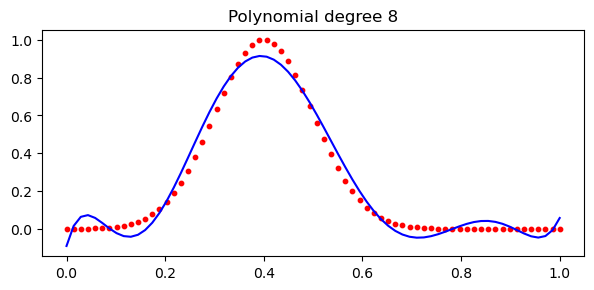

In [68]:
# ************************************************
#   Example: fit Gaussian with Polynomial
# ************************************************
import matplotlib.pyplot as plt      # set of functions for drawing graphs

# some parameters to tweak the example prtoblem
degree = 8 # polynomial degree (max. x-power)
N = 70 # number of data points

# make x-range for the function. Note that it is best to keep x-vaues smalle as for larger polynomial degree one can get overflow
x = np.linspace(0,1,N)     # use this array to calculate data points

# make Gaussian function
A, x0, sigma = 1., .4, .1
y = A * np.exp(-0.5*((x-x0)/sigma)**2)

# calculate polynomial coefficients
b, X = poly_regression(x,y,degree)
print(f'Polynomial coefficients:\nb = {b}')  # print polynomial coefficients

yy = X @ b.transpose() # calculate the respective polynomial fit function, Y = X @ b, b must be column - transpose 

# plot data x,y and fit function x,yy
fig = plt.figure(figsize=(7,3),dpi=100)
ax = plt.axes()
ax.scatter(x,y,s=10,c='red') # plot the original data points (xi,yi) it as a scatter graph
ax.set_title(f'Polynomial degree {degree}')
ax.plot(x,yy,color = 'blue') # plot the model fit, (xi,yyi)

# Convert Gaussian model function to look like polynomial

As one can see, the fit of Gaussian with the polynomial requires to use degree of >10 for a reasonable fit, i.e. >10 parameters desctibe this function in polynomial form, while there are just 3 parameters needed to describe the Gaussian function using an exponent:
$$
y(x) = A\exp \left ( -\frac{(x-x_0)^2}{2\sigma^2} \right )
$$
We can, however, transform it into polynomial form by taking $log()$ of both sides:
$$
\log(y) = \log(A) -\frac{(x-x_0)^2}{2\sigma^2} 
$$
After expanding the square:
$$
\log(y) = \log(A) -\frac{x^2-2 x_0 x +x_0^2}{2\sigma^2} 
$$
And separating powers of $x$:
$$
\log(y) = \left(\log(A) - \frac{x_0^2}{2\sigma^2}\right) 
+ \left(\frac{x_0}{\sigma^2} \right)x
+ \left(-\frac{1}{2\sigma^2}\right)x^2
$$
This is polynomial of second degree and thus could be fit perfectly with a polynomial function.All we have to du is to replace $y(x)$ data set with $y'(x)=\log(y'(x))$:
$$
y' = b_0 + b_1 x + b_2 x^2 \\
$$
where:
$$
b_0 = \log(A) - \frac{x_0^2}{2\sigma^2},\quad
b_1 = \frac{x_0}{\sigma^2} ,\quad
b_2 =-\frac{1}{2\sigma^2} 
$$
Once coefficients $b_0,b_1,b_2$ are found, the original Gaussian parameters can be computed:
$$
\sigma = \sqrt {-\frac{1}{2b_2}}, \quad
x_0 = b_1 \sigma^2, \quad
A = \exp\left(b_0 +\frac{x_0^2}{2\sigma^2}\right)
$$
In the following code, we will convert $y$ into $y'=\log(y)$, fit with second degree polynomial, plot both fits (plain polynomial from previous code and this fit) and extract Gaussian parameters from the polynomial expansion coefficients.


Polynomial coefficients:
b = [ -8.  40. -50.]
Gaussian: A = 1.0000000000000728, x0= 0.4000000000000019, sigma = 0.09999999999999931


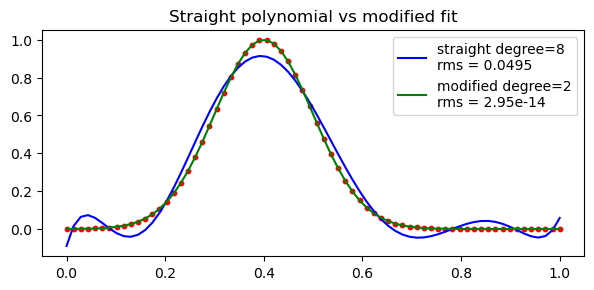

In [70]:
# convert y date into y-prime = log(y)
yp = np.log(y)

# calculate polynomial coefficients
b, X = poly_regression(x,yp,2)
print(f'Polynomial coefficients:\nb = {b}')  # print polynomial coefficients
sigma_f = sqrt(-0.5/b[2])
x0_f = b[1] * sigma_f**2
A_f = exp(b[0] + x0_f**2 /2/sigma_f**2)
print(f'Gaussian: A = {A_f}, x0= {x0_f}, sigma = {sigma_f}')

yyp = X @ b.transpose() # calculate the respective polynomial fit function, Y = X @ b, b must be column - transpose 
yyp = np.exp(yyp)

# plot data x,y and fit function x,yy
fig = plt.figure(figsize=(7,3),dpi=100)
ax = plt.axes()
ax.scatter(x,y,s=10,c='red') # plot the original data points (xi,yi) it as a scatter graph
ax.set_title(f'Straight polynomial vs modified fit')
ax.plot(x,yy,color = 'blue',label=f'straight degree={degree}\nrms = {sqrt(np.sum((yy-y)**2)/len(x)):.3g}') # plot the model fit, (xi,yyi)
ax.plot(x,yyp,color = 'green',label = f'modified degree=2\nrms = {sqrt(np.sum((yyp-y)**2)/len(x)):.3g}')
plt.legend()

# Example 2: Fit exponential
Let us condider an exponential function, which is a general model for decaying processes, such as radioactive decay of nuclei or decay of excited states of a molecules:
$$
y(x) = A\exp \left ( -\frac{x}{\tau} \right )
$$
Here the argument $x$ is typically time, and $\tau$ is the 'decay' time for the process. In the program below we will first fit the f(t) function as is with the polynomial (green line). To get a reasonable fit one needs to use polynomial of rank > 5, i.e. there are 6 parameters defining the curve. However, one can see that the model above has just two parameters of the fit ($A$ and $\tau$), fitting it with 5 polynomial coefficients does not shed much light onto the problem and does not reveal the $\tau$.<p>

The problem, however, could be rewritten in the following form:
$$
\log \left[ y(x) \right] =  \log \left[A\exp \left ( -\frac{x}{\tau} \right ) \right] 
$$
$$
\log \left[ y(x) \right] = \log(A) -\frac{1}{\tau}x
$$<br>
The problem now looks like a first degree  polynomial. The experimental data $y(x)$ can be  substituted with $y'(x) = \log\left[ y(x) \right]$, and we have:<br>
$$
y'(x) = -\frac{1}{\tau}x + \log(A) 
$$<br>
It can now be (and should be) fit with the 1st degree polynomial, and the model parameters $\tau = -1/\beta_1$, $A = \exp\left(\beta_0\right)$, where $\beta_1$ tis he coefficient in front of $x^1$ of the polynomial, and $\beta_0$ is the first coefficient (constant).<br>
In the second part of this example we will use this approach and extract the actual $A$ and $\tau$ parameters of the model (blue line in the plot).

Polynomial to exponent, b = [ 1.70546619 -9.54602897 16.21616165 -8.5082435 ]
Polynomial for modified function: b=[  0.69314718 -10.        ]
    respective tau = 0.09999999999999992, amplitude = 2.0000000000000036


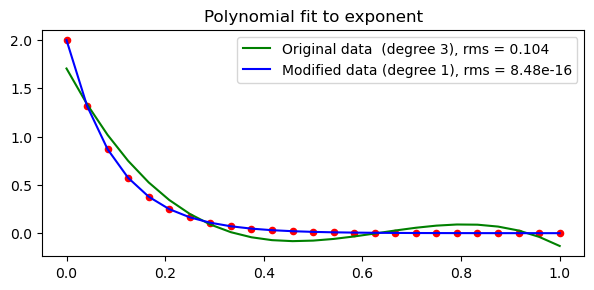

In [53]:
degree = 3 # rank of the direct fit polynomial
N = 25   # number of data points

# make x-range for the function
x = np.linspace(0,1,N)

# make exponential function with amplitude 1 at 0 time and decay time tau
ampl, tau = 2., 0.1
y = ampl * np.exp(-(x)/tau)

# ********************************************************
# **** calculate polynomial coefficients to exp function directly
# *********************************************************
b, X = poly_regression(x,y,degree)
print(f'Polynomial to exponent, b = {b}')
yy = X @ b.transpose() # calculate the respective polynomial model function

# *******************************************************************
# ************ alternative: modify exp to look like polynomial
#********************************************************************
degreem = 1        # we must now be able to fit using the first degree polynomial (i.e. linear regression)
yp = np.log(y)     # transform initial function y data to its log(), y' = log(y)
b, X = poly_regression(x,yp,degreem)
print(f'Polynomial for modified function: b={b}\n    respective tau = {-1/b[1]}, amplitude = {exp(b[0])}')
yyy = np.exp( X @ b.transpose() )  # calculate theoretical function y' and transform it back to y

# **********************************
# **** PLOT everything
# **********************************
fig = plt.figure(figsize=(7,3),dpi=100)
ax = plt.axes()
ax.scatter(x,y,s=20,c='red')
ax.set_title('Polynomial fit to exponent')
ax.plot(x,yy,color = 'green',label = f'Original data  (degree {degree}), rms = {sqrt(np.sum((yy-y)**2)/len(x)):.3g}')
ax.plot(x,yyy,'blue',label = f'Modified data (degree {degreem}), rms = {sqrt(np.sum((yyy-y)**2)/len(x)):.3g}')
plt.legend()